<a href="https://colab.research.google.com/github/choprahetarth/Hands-on-NLP/blob/main/TF_NLP_Zero_To_Hero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences =[
            'I love my dog',
            'I love my cat',
            'You are my dog!' #it should ignore the exclamation mark
]

In [ ]:
tokenizer = Tokenizer(num_words = 100) #get the most frequent 100 words

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'are': 7, 'cat': 5, 'dog': 4, 'i': 2, 'love': 3, 'my': 1, 'you': 6}

# Tutorial 2

In [ ]:
sentences =[
            'I love my dog',
            'I love my cat',
            'You are my dog!' #it should ignore the exclamation mark
            'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words=100)

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(word_index)
print(sequences)

{'my': 1, 'dog': 2, 'i': 3, 'love': 4, 'you': 5, 'cat': 6, 'are': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[3, 4, 1, 2], [3, 4, 1, 6], [5, 7, 1, 2, 8, 5, 9, 1, 2, 10, 11]]


In [ ]:
test_data = [
             'i realy love my dog',
             'my dog loves my mantee, and the shrimp' 
]
# in this example there are more words than what we have tokenized

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_data)

In [ ]:
test_sequences

[[3, 4, 1, 2], [1, 2, 1]]

In [ ]:
# in order to not lose the length of the sequence, OOV is added (out of vocabulary)

In [ ]:
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(word_index)
print(sequences)

{'<OOV>': 1, 'my': 2, 'dog': 3, 'i': 4, 'love': 5, 'you': 6, 'cat': 7, 'are': 8, 'do': 9, 'think': 10, 'is': 11, 'amazing': 12}
[[4, 5, 2, 3], [4, 5, 2, 7], [6, 8, 2, 3, 9, 6, 10, 2, 3, 11, 12]]


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_data)

In [ ]:
test_sequences

[[4, 1, 5, 2, 3], [2, 3, 1, 2, 1, 1, 1, 1]]

In [ ]:
## Sequence padding so as to make them of the same length 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [
             'I love my dog',
             'I love my cat',
             'You love my dog!',
             'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words =100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'amazing': 11,
 'cat': 7,
 'do': 8,
 'dog': 4,
 'i': 5,
 'is': 10,
 'love': 3,
 'my': 2,
 'think': 9,
 'you': 6}

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences)

In [ ]:
print(sequences)
print(padded)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_data)
padded_test = pad_sequences(test_sequences,padding="post") # adds the zeroes after the sequence
print(test_sequences)
print(padded_test)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1, 1, 1, 1]]
[[5 1 3 2 4 0 0 0]
 [2 4 1 2 1 1 1 1]]


In [ ]:
padded_test = pad_sequences(test_sequences,padding="post",
                            truncating='post',maxlen =3) # adds the zeroes after the sequence and specifies a hard limit with post and pre truncation
print(padded_test)

[[5 1 3]
 [2 4 1]]


# Tutorial 3

In [ ]:
# a sentiment classification neural network based on NLP

In [ ]:
import os 
import json
import pandas as pd
import numpy as np 
from itertools import islice
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Sarcasm-Detection-TF-keras/archive')

In [ ]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json',lines= True)

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
#train test split using pandas 
mask = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]

In [ ]:
print(train.shape)
print(test.shape)

(21286, 3)
(5423, 3)


In [ ]:
#parameters
vocab_size = 15000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_ = '<OOV>'
embedding_dim = 32 #why is this?

In [ ]:
train_sentences = train['headline']
test_sentences = test['headline']

In [ ]:
train_labels = train['is_sarcastic']
test_labels = test['is_sarcastic']

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index


train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,
                            padding = padding_type,
                            truncating = trunc_type,
                            maxlen=max_length,
                            )

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, 
                            padding = padding_type,
                            truncating = trunc_type,
                            maxlen=max_length,
                            )

In [ ]:
# Return first n items of the iterable as a list
def take(n, iterable):
  return list(islice(iterable, n))

n_items = take(15, word_index.items())

In [ ]:
print(train_padded[0])
print(test_padded[0])
print(train_sequences[0])
print(test_sequences[0])

[   4 7213 3552 2771   21    2  166 9236  441 3013    6  261    9  918
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[  316     1   672  3537  2181    49   393  3410     1     6  2252 12838
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     

In [ ]:
# convert to numpy array
train_padded = np.array(train_padded)
test_padded = np.array(test_padded)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(vocab_size,
                                    embedding_dim,
                                    input_length=max_length),
          tf.keras.layers.GlobalAveragePooling1D(),
          tf.keras.layers.Dense(24,activation='relu'),
          tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           480000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 480,817
Trainable params: 480,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(x = train_padded,
                    y = train_labels,
                    epochs = num_epochs,
                    validation_data = (test_padded,test_labels),
                    verbose = 1)

Epoch 1/10
666/666 [==============================] - 6s 8ms/step - loss: 0.6499 - accuracy: 0.6199 - val_loss: 0.5098 - val_accuracy: 0.8066
Epoch 2/10
666/666 [==============================] - 5s 8ms/step - loss: 0.3854 - accuracy: 0.8462 - val_loss: 0.3705 - val_accuracy: 0.8320
Epoch 3/10
666/666 [==============================] - 5s 7ms/step - loss: 0.2841 - accuracy: 0.8881 - val_loss: 0.3344 - val_accuracy: 0.8562
Epoch 4/10
666/666 [==============================] - 5s 8ms/step - loss: 0.2294 - accuracy: 0.9130 - val_loss: 0.3291 - val_accuracy: 0.8576
Epoch 5/10
666/666 [==============================] - 5s 8ms/step - loss: 0.1916 - accuracy: 0.9305 - val_loss: 0.3342 - val_accuracy: 0.8606
Epoch 6/10
666/666 [==============================] - 5s 8ms/step - loss: 0.1628 - accuracy: 0.9411 - val_loss: 0.3488 - val_accuracy: 0.8575
Epoch 7/10
666/666 [==============================] - 5s 8ms/step - loss: 0.1394 - accuracy: 0.9508 - val_loss: 0.3675 - val_accuracy: 0.8543
Epoch 

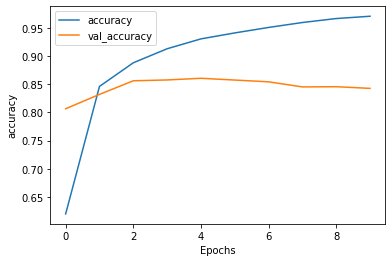

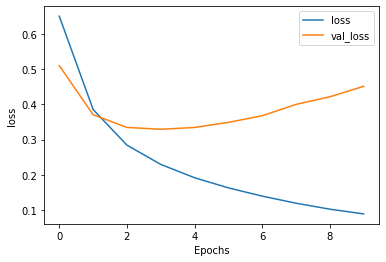

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence,
                       maxlen=max_length,
                       padding=padding_type,
                       truncating=trunc_type)
print(model.predict(padded))

[[0.79725015]
 [0.0057303 ]]


# Tutorial 4 - AI to complete poetry

In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-10-25 14:02:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-10-25 14:02:09 (101 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
data = open('/tmp/irish-lyrics-eof.txt').read()

In [5]:
corpus = data.lower().split('\n')

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# we need to add a padding keyword thats why total words has a +1 added

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [7]:
n_grams = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    n_grams.append(n_gram_sequence)
# convert n_grams to padded sequences
maximum_length = max([len(x) for x in n_grams])
n_grams_input = np.array(pad_sequences(n_grams, 
                                       maxlen = maximum_length, 
                                       padding='pre'))

x,labels = n_grams_input[:,:-1],n_grams_input[:,-1]

In [8]:
# convert y to categorical
y = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words,200,input_length = maximum_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 200)           538000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               421200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,768,890
Trainable params: 1,768,890
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 15s 18ms/step - loss: 6.6553 - accuracy: 0.0762
Epoch 2/100
377/377 [==============================] - 7s 17ms/step - loss: 5.7502 - accuracy: 0.1151
Epoch 3/100
377/377 [==============================] - 7s 17ms/step - loss: 5.3102 - accuracy: 0.1500
Epoch 4/100
377/377 [==============================] - 7s 17ms/step - loss: 4.5061 - accuracy: 0.2007
Epoch 5/100
377/377 [==============================] - 6s 17ms/step - loss: 3.5409 - accuracy: 0.2848
Epoch 6/100
377/377 [==============================] - 6s 17ms/step - loss: 2.8633 - accuracy: 0.3715
Epoch 7/100
377/377 [==============================] - 6s 16ms/step - loss: 2.4064 - accuracy: 0.4468
Epoch 8/100
377/377 [==============================] - 6s 16ms/step - loss: 2.0832 - accuracy: 0.5071
Epoch 9/100
377/377 [==============================] - 6s 15ms/step - loss: 1.8943 - accuracy: 0.5419
Epoch 10/100
377/377 [==============================] - 6s 15ms/step - loss: 1.66

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

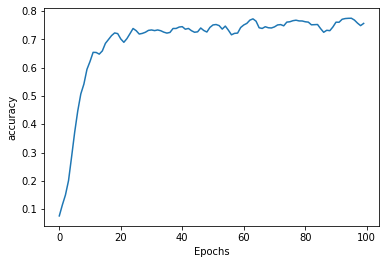

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
seed_text = "I've got a bad feeling about this"
next_words = 100

In [14]:
# print(tokenizer.word_index["I've"])
print(tokenizer.word_index['got'])
print(tokenizer.word_index['a'])
print(tokenizer.word_index['bad'])
print(tokenizer.word_index['feeling'])
print(tokenizer.word_index['about'])
print(tokenizer.word_index['this'])
# print(tokenizer.word_index['lanigan'])

247
5
881
813
2061
70


In [ ]:
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=maximum_length-1, padding='pre')
  predict_x = model.predict(token_list, verbose=0)
  classes_x= np.argmax(predict_x,axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word

In [27]:
seed_text

"I've got a bad feeling about this little art heavenward o power of my power of light was play girded on again died and i cannot cross over an open door and wines of golden hair along johnny yet oflynn as ofttimes before somewhere but i cant remember when eer i had mary there through the sands the pale stars above i lay gone easy as an fire it was in fray see the loved here in ringlets jollity my eyes was painted who fought and sport and play wid little girl by sea and no top to their dresses at revealing hours of gladness feet were gone alas across and moon shine is shining clearly ladies she filled them up cry reflections rattling oer the barley and the bran know heather immortal maiden by bright golden views to enchanting rostrevor by gone by daylight ireland were them by an old cask door and tears me gone by today and tomorrow and lanigans ball who fighting fall upon his over old pianos setting there i can them mother than my darlin sportin wheel since the fair round the cliffs of 